In [1]:
import os,shutil
import os, shutil
import cv2
import numpy as np
import matplotlib.pyplot as plt
from random import shuffle
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD
from keras import layers, models, optimizers
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [2]:
#dosya yar ise tekrar oluşturup hata almamızı sağlıyor
def DosyaVarlık(DosyaYol):
    if os.path.exists(DosyaYol)==False:
        os.mkdir(DosyaYol)

In [3]:
AnaDosya="C:\\Users\\Bunyamin\\Desktop\\BilgiSistemleriOdev\\Kedi_mi_Orumcek_mi"
DosyaVarlık(AnaDosya)
    

EgitimDosya=os.path.join(AnaDosya,"egitim")
DosyaVarlık(EgitimDosya)
    
DogrulamaDosya=os.path.join(AnaDosya,"dogrulama")
DosyaVarlık(DogrulamaDosya)

TestDosya=os.path.join(AnaDosya,"test")
DosyaVarlık(TestDosya)
    
#Eğitim verilerini içeren dizinler oluşturuluyor
EgitimKediDosya=os.path.join(EgitimDosya,"kedi")
DosyaVarlık(EgitimKediDosya)
EgitimOrumcekDosya=os.path.join(EgitimDosya,"orumcek")
DosyaVarlık(EgitimOrumcekDosya)

#Doğrulama verilerini içeren dizinler oluşturuluyor
DogrulamaKediDosya=os.path.join(DogrulamaDosya,"kedi")
DosyaVarlık(DogrulamaKediDosya)
DogrulamaOrumcekDosya=os.path.join(DogrulamaDosya,"orumcek")
DosyaVarlık(DogrulamaOrumcekDosya)

#Test verilerini içeren dizinler oluşturuluyor
TestKediDosya=os.path.join(TestDosya,"kedi")
DosyaVarlık(TestKediDosya)
TestOrumcekDosya=os.path.join(TestDosya,"orumcek")
DosyaVarlık(TestOrumcekDosya)

In [4]:
original_dataset_dir="C:\\Users\\Bunyamin\\Desktop\\BilgiSistemleriOdev\\Resimler"

EgitimDosya=os.path.join(AnaDosya,"egitim")
DogrulamaDosya=os.path.join(AnaDosya,"dogrulama")
TestDosya=os.path.join(AnaDosya,"test")

EgitimKediDosya=os.path.join(EgitimDosya,"kedi")
EgitimOrumcekDosya=os.path.join(EgitimDosya,"orumcek")

DogrulamaKediDosya=os.path.join(DogrulamaDosya,"kedi")
DogrulamaOrumcekDosya=os.path.join(DogrulamaDosya,"orumcek")

TestKediDosya=os.path.join(TestDosya,"kedi")
TestOrumcekDosya=os.path.join(TestDosya,"orumcek")

In [5]:
#kedi
fnames=["kedi.{}.jpg".format(i) for i in range(200)]
for fname in fnames:
    src=os.path.join(original_dataset_dir,fname)
    dst=os.path.join(EgitimKediDosya,fname)
    shutil.copyfile(src,dst)

fnames=["kedi.{}.jpg".format(i) for i in range(200,280)]
for fname in fnames:
    src=os.path.join(original_dataset_dir,fname)
    dst=os.path.join(DogrulamaKediDosya,fname)
    shutil.copyfile(src,dst)
       
fnames=["kedi.{}.jpg".format(i) for i in range(280,360)]
for fname in fnames:
    src=os.path.join(original_dataset_dir,fname)
    dst=os.path.join(TestKediDosya,fname)
    shutil.copyfile(src,dst)
    
#örümcek    
fnames=["orumcek.{}.jpg".format(i) for i in range(200)]
for fname in fnames:
    src=os.path.join(original_dataset_dir,fname)
    dst=os.path.join(EgitimOrumcekDosya,fname)
    shutil.copyfile(src,dst)
    
fnames=["orumcek.{}.jpg".format(i) for i in range(200,280)]
for fname in fnames:
    src=os.path.join(original_dataset_dir,fname)
    dst=os.path.join(DogrulamaOrumcekDosya,fname)
    shutil.copyfile(src,dst)
        
fnames=["orumcek.{}.jpg".format(i) for i in range(280,360)]
for fname in fnames:
    src=os.path.join(original_dataset_dir,fname)
    dst=os.path.join(TestOrumcekDosya,fname)
    shutil.copyfile(src,dst)

In [6]:
print("Toplam Eğitim İçin Ayrılan Kedi Resmleri:",len(os.listdir(EgitimKediDosya)))
print("Toplam Eğitim İçin Ayrılan Örümcek Resimleri:",len(os.listdir(EgitimOrumcekDosya)))
print("Toplam Eğitim Resmleri:",len(os.listdir(EgitimKediDosya))+len(os.listdir(EgitimOrumcekDosya)))
print()

print("Toplam Doğrulama İçin Ayrılan Kedi Resimleri:",len(os.listdir(DogrulamaKediDosya)))
print("Toplam Doğrulama İçin Ayrılan Örümcek Resimleri:",len(os.listdir(DogrulamaOrumcekDosya)))
print("Toplam Doğrulama Resimleri:",len(os.listdir(DogrulamaKediDosya))+len(os.listdir(DogrulamaOrumcekDosya)))
print()

print("Toplam Test İçin Ayrılan Kedi Resmleri:",len(os.listdir(TestKediDosya)))
print("Toplam Test İçin Ayrılan Örümcek Resmleri:",len(os.listdir(TestOrumcekDosya)))
print("Toplam Test Resmleri:",len(os.listdir(TestKediDosya))+len(os.listdir(TestOrumcekDosya)))

Toplam Eğitim İçin Ayrılan Kedi Resmleri: 200
Toplam Eğitim İçin Ayrılan Örümcek Resimleri: 200
Toplam Eğitim Resmleri: 400

Toplam Doğrulama İçin Ayrılan Kedi Resimleri: 80
Toplam Doğrulama İçin Ayrılan Örümcek Resimleri: 80
Toplam Doğrulama Resimleri: 160

Toplam Test İçin Ayrılan Kedi Resmleri: 80
Toplam Test İçin Ayrılan Örümcek Resmleri: 80
Toplam Test Resmleri: 160


Modelimizi oluşturuyorum.

In [7]:
def Model():
    
    model = Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
    
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3,3), activation='relu'))
    model.add(layers.MaxPool2D(2, 2))
    model.add(layers.Conv2D(128, (3,3), activation='relu'))
    model.add(layers.MaxPool2D(2, 2))
    model.add(layers.Conv2D(128, (3,3), activation='relu'))
    model.add(layers.MaxPool2D(2, 2))
    model.add(layers.Flatten())
    model.add(layers.Dense(512, activation='relu', kernel_initializer='he_uniform'))
    model.add(layers.Dense(1, activation='sigmoid'))
    # mdeoli derliyorum
    model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])
    return model

Grafikleri oluşturmak için fonksiyonumuzu tanımlıyorum.

In [8]:
def GrafCiz(gecmis):
    acc = gecmis.history['acc']
    val_acc = gecmis.history['val_acc']
    loss = gecmis.history['loss']
    val_loss = gecmis.history['val_loss']

    epochs=range(1, len(acc)+1)

    plt.plot(epochs, acc, 'co', label='Eğitim ACC')
    plt.plot(epochs, val_acc, 'c', label='Güvenirlik ACC')
    plt.title('Eğitim ve  Doğrulama Hassasiyet')    
    plt.xlabel('Acc')
    plt.ylabel('Val Acc')
    plt.legend()

    plt.figure()

    plt.plot(epochs, loss, 'co', label='Eğitim Kayıp')
    plt.plot(epochs, val_loss, 'c', label='Doğrulama Kayıp')
    plt.title('Eğitim ve Doğrulama Kayıp')
    plt.xlabel('Loss')
    plt.ylabel('Val Loss')
    plt.legend()

    plt.show()

In [9]:
#Modelimizi çağrıyoruz
model =Model()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [10]:
VeriGenIlk = ImageDataGenerator(rescale=1.0/255.0)

# Eğitmek için resimleri hazaırlıyorum
EgitimUretici = VeriGenIlk.flow_from_directory(EgitimDosya,
    class_mode='binary', batch_size=64, target_size=(150, 150))
TestUretici = VeriGenIlk.flow_from_directory(DogrulamaDosya,
    class_mode='binary', batch_size=64, target_size=(150, 150))

Found 400 images belonging to 2 classes.
Found 160 images belonging to 2 classes.


In [11]:
for data_batch, labels_batch in EgitimUretici:
    print('Data Batch Shape',data_batch.shape)
    print('Label Batch Shape',data_batch.shape)
    break

Data Batch Shape (64, 150, 150, 3)
Label Batch Shape (64, 150, 150, 3)


In [12]:
#Modeli eğitiyoruz
Gecmis = model.fit_generator(EgitimUretici, epochs = 30, steps_per_epoch= 60, validation_data=TestUretici, 
                             validation_steps=90)


Epoch 1/30
60/60 [==============================] - 57s 956ms/step - loss: 0.5260 - acc: 0.7567 - val_loss: 0.3149 - val_acc: 0.8250
Epoch 2/30
60/60 [==============================] - 56s 939ms/step - loss: 0.2922 - acc: 0.8837 - val_loss: 0.6211 - val_acc: 0.8813
Epoch 3/30
60/60 [==============================] - 57s 948ms/step - loss: 0.1963 - acc: 0.9277 - val_loss: 0.1738 - val_acc: 0.8750
Epoch 4/30
60/60 [==============================] - 57s 949ms/step - loss: 0.1501 - acc: 0.9457 - val_loss: 0.3152 - val_acc: 0.8938
Epoch 5/30
60/60 [==============================] - 57s 946ms/step - loss: 0.1032 - acc: 0.9648 - val_loss: 0.1398 - val_acc: 0.9000
Epoch 6/30
60/60 [==============================] - 58s 964ms/step - loss: 0.0694 - acc: 0.9774 - val_loss: 0.1084 - val_acc: 0.9125
Epoch 7/30
60/60 [==============================] - 57s 948ms/step - loss: 0.0395 - acc: 0.9900 - val_loss: 0.4642 - val_acc: 0.9062
Epoch 8/30
60/60 [==============================] - 57s 956ms/step -

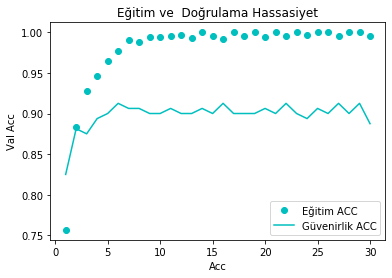

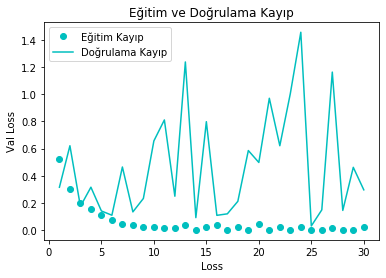

In [13]:
GrafCiz(Gecmis)

Train/validation accuracy grafinde yaklaşık 0-2 aralığında overfit gözlenmiyor.
Epoch kesme kullanırsak yaklaşık 4.adımdan sonra kesmemiz lazım.

In [14]:
#Testin güvenirliğini yazdırıyorıyoruz.
TestUretici=VeriGenIlk.flow_from_directory(TestDosya, target_size=(150,150),batch_size=64, class_mode='binary')
TestKayip, TestDogruluk=model.evaluate_generator(TestUretici,steps=90)
print('TEST ACC:',TestDogruluk)

Found 160 images belonging to 2 classes.
TEST ACC: 0.800000011920929


In [15]:
#data augmentation için model
model=Model()

In [16]:
#data augmentation 
VeriGenEgitimDataAug = ImageDataGenerator(rescale=1./255, rotation_range=40, width_shift_range=0.2, height_shift_range=0.2,
                                    shear_range=0.2, zoom_range=0.2, horizontal_flip=True,)

# Doğrulama için veri oluşturuyoruz
VeriGenTestDataAug = ImageDataGenerator(rescale=1./255)

EgitimUreticiDataAug = VeriGenEgitimDataAug.flow_from_directory(
        # Eğitilecek dosya yolu
        EgitimDosya,
        # bütün resimleri 150x150 olarak boyutlandırıyoruz
        target_size=(150, 150),
        batch_size=64,
        # Binary_crossentropy kaybı kullanıyoruz.
        class_mode='binary')

TesUerticiDataAug = VeriGenTestDataAug.flow_from_directory(
        DogrulamaDosya,
        target_size=(150, 150),
        batch_size=64,
        class_mode='binary')

Found 400 images belonging to 2 classes.
Found 160 images belonging to 2 classes.


In [17]:
for data_batch, labels_batch in EgitimUreticiDataAug:
    print('Data Batch Shape',data_batch.shape)
    print('Label Batch Shape',data_batch.shape)
    break

Data Batch Shape (64, 150, 150, 3)
Label Batch Shape (64, 150, 150, 3)


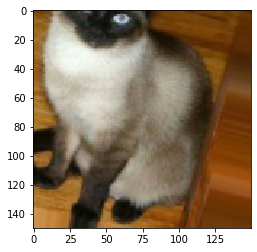

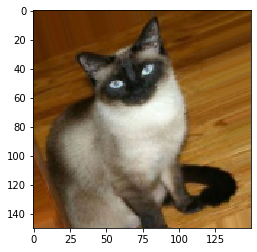

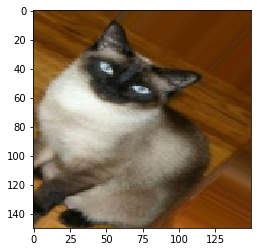

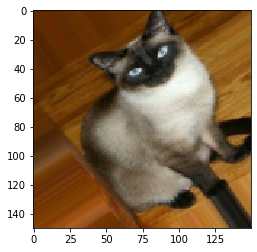

In [18]:
#data augmentation nasıl çalıştığını gözlemdim.
from keras.preprocessing import image

Poz=[os.path.join(EgitimKediDosya,fname) for fname in os.listdir(EgitimKediDosya)]

ResimYolu=Poz[14]

Resim=image.load_img(ResimYolu,target_size=(150,150))

X=image.img_to_array(Resim)

X=X.reshape((1,)+X.shape)

i=0
for batch in VeriGenEgitimDataAug.flow(X,batch_size=1):
    plt.figure(i)
    imgplot=plt.imshow(image.array_to_img(batch[0]))
    i+=1
    if i%4==0:
        break
plt.show()

In [19]:
#mdoeli eğitiyoruz
GecmisDataAug = model.fit_generator(EgitimUreticiDataAug, steps_per_epoch=60, epochs=30, validation_data=TesUerticiDataAug,
      validation_steps=50)

Epoch 1/30
60/60 [==============================] - 60s 992ms/step - loss: 0.6566 - acc: 0.6209 - val_loss: 0.6209 - val_acc: 0.6190
Epoch 2/30
60/60 [==============================] - 55s 918ms/step - loss: 0.5044 - acc: 0.7546 - val_loss: 0.7448 - val_acc: 0.6604
Epoch 3/30
60/60 [==============================] - 54s 903ms/step - loss: 0.4250 - acc: 0.8169 - val_loss: 0.3121 - val_acc: 0.8197
Epoch 4/30
60/60 [==============================] - 55s 910ms/step - loss: 0.3668 - acc: 0.8400 - val_loss: 0.2375 - val_acc: 0.9018
Epoch 5/30
60/60 [==============================] - 55s 920ms/step - loss: 0.3229 - acc: 0.8626 - val_loss: 0.4001 - val_acc: 0.9175
Epoch 6/30
60/60 [==============================] - 54s 905ms/step - loss: 0.3383 - acc: 0.8506 - val_loss: 0.1812 - val_acc: 0.8754
Epoch 7/30
60/60 [==============================] - 59s 992ms/step - loss: 0.3013 - acc: 0.8785 - val_loss: 0.3866 - val_acc: 0.8824
Epoch 8/30
60/60 [==============================] - 57s 956ms/step - 

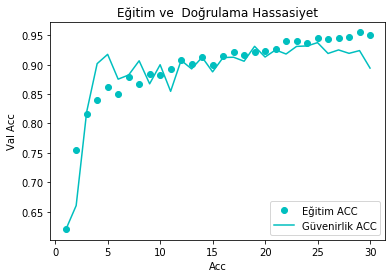

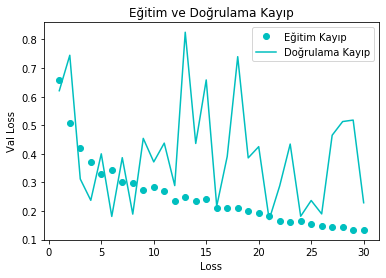

In [20]:
GrafCiz(GecmisDataAug)

Data Augmentation kullandığımız modelimiz ile Normal olan modelimiz(CNN-maxpool) arasındaki fark; paralelleşme arttı,maksasın kapandığı gözlemdim ve overfittin önüne geçtik.Modelin doğruluk oranında artış gözlemledim.Epoch kesme ile yaklaşık 24. admıda kesilmesi gerekmektedir.

In [21]:
TesUerticiDataAug=VeriGenEgitimDataAug.flow_from_directory(TestDosya, target_size=(150,150),batch_size=64, class_mode='binary')
TestKayip, TestDogruluk=model.evaluate_generator(TesUerticiDataAug,steps=90)
print('Test ACC:',TestDogruluk)

Found 160 images belonging to 2 classes.
Test ACC: 0.8547916412353516


In [22]:
def DropOutModel():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dropout(0.5))#0.5 dropout
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])
    return model

In [23]:
#Dropout modelini çağrıyoruz
model = DropOutModel()

In [24]:
#data augmentation 
VeriGenDropOut = ImageDataGenerator(rescale=1./255, rotation_range=40, width_shift_range=0.2, height_shift_range=0.2,
                                    shear_range=0.2, zoom_range=0.2, horizontal_flip=True,)

VeriGenTestDataAug = ImageDataGenerator(rescale=1./255)

EgitimUreticiDrop = VeriGenDropOut.flow_from_directory(
        EgitimDosya,
        target_size=(150, 150),
        batch_size=64,
        class_mode='binary')

TesUreticiDrop = VeriGenTestDataAug.flow_from_directory(
        DogrulamaDosya,
        target_size=(150, 150),
        batch_size=64,
        class_mode='binary')

Found 400 images belonging to 2 classes.
Found 160 images belonging to 2 classes.


In [25]:
for data_batch, labels_batch in EgitimUreticiDrop:
    print('Data Batch Shape',data_batch.shape)
    print('Label Batch Shape',data_batch.shape)
    break

Data Batch Shape (64, 150, 150, 3)
Label Batch Shape (64, 150, 150, 3)


In [26]:
GecmisDropOut = model.fit_generator(EgitimUreticiDrop, steps_per_epoch=60, epochs=30, validation_data=TesUreticiDrop,
                              validation_steps=50)

Epoch 1/30
60/60 [==============================] - 55s 917ms/step - loss: 0.6733 - acc: 0.5728 - val_loss: 0.6423 - val_acc: 0.7132
Epoch 2/30
60/60 [==============================] - 55s 923ms/step - loss: 0.5552 - acc: 0.7260 - val_loss: 0.5751 - val_acc: 0.6562
Epoch 3/30
60/60 [==============================] - 55s 918ms/step - loss: 0.4540 - acc: 0.7980 - val_loss: 0.8697 - val_acc: 0.7549
Epoch 4/30
60/60 [==============================] - 55s 915ms/step - loss: 0.3995 - acc: 0.8192 - val_loss: 0.4653 - val_acc: 0.8869
Epoch 5/30
60/60 [==============================] - 55s 910ms/step - loss: 0.3644 - acc: 0.8410 - val_loss: 0.2243 - val_acc: 0.8889
Epoch 6/30
60/60 [==============================] - 55s 920ms/step - loss: 0.3360 - acc: 0.8553 - val_loss: 0.2051 - val_acc: 0.8490
Epoch 7/30
60/60 [==============================] - 55s 918ms/step - loss: 0.3144 - acc: 0.8636 - val_loss: 0.5142 - val_acc: 0.8940
Epoch 8/30
60/60 [==============================] - 55s 918ms/step - 

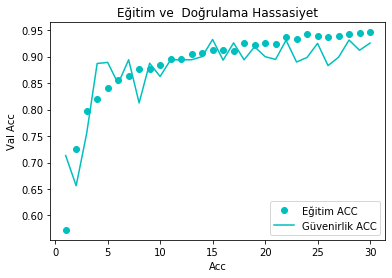

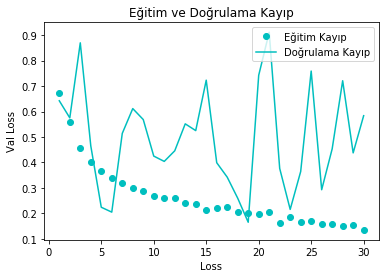

In [27]:
GrafCiz(GecmisDropOut)

Modelimize dropout uyguladıktan sonra Overfitting'in arttığı gözlemledim.Modelin doğruluk alanında ciddi bir artış oldu.

In [28]:
EgitimUreticiDrop=VeriGenDropOut.flow_from_directory(TestDosya, target_size=(150,150),batch_size=64, class_mode='binary')
TestKayip, TestDogruluk=model.evaluate_generator(TesUreticiDrop,steps=90)
print('TEST ACC:',TestDogruluk)

Found 160 images belonging to 2 classes.
TEST ACC: 0.925000011920929


In [29]:
#Dropout kullanıyoruz
model = DropOutModel()

In [30]:
#data augmentation 
VeriGenHepsi = ImageDataGenerator(rescale=1./255, rotation_range=40, width_shift_range=0.2, height_shift_range=0.2,
                                    shear_range=0.2, zoom_range=0.2, horizontal_flip=True,)

VeriGenTestDataHepsi = ImageDataGenerator(rescale=1./255)

EgitimUretici = VeriGenHepsi.flow_from_directory(
        EgitimDosya,
        target_size=(150, 150),
        batch_size=64,
        class_mode='binary')

TesUretici = VeriGenTestDataHepsi.flow_from_directory(
        DogrulamaDosya,
        target_size=(150, 150),
        batch_size=64,
        class_mode='binary')

Found 400 images belonging to 2 classes.
Found 160 images belonging to 2 classes.


In [31]:
for data_batch, labels_batch in EgitimUreticiDrop:
    print('Data Batch Shape',data_batch.shape)
    print('Label Batch Shape',data_batch.shape)
    break

Data Batch Shape (64, 150, 150, 3)
Label Batch Shape (64, 150, 150, 3)


Epoch kesme Grafikteki makas ayrılığına göre ayarlandı 17. adımda kesildi

In [32]:
GecmisHepsi = model.fit_generator(EgitimUretici, steps_per_epoch=60, epochs=17, validation_data=TesUretici,
                              validation_steps=50)

Epoch 1/17
60/60 [==============================] - 51s 843ms/step - loss: 0.6818 - acc: 0.5552 - val_loss: 0.5943 - val_acc: 0.8062
Epoch 2/17
60/60 [==============================] - 51s 854ms/step - loss: 0.5776 - acc: 0.7057 - val_loss: 0.4518 - val_acc: 0.8690
Epoch 3/17
60/60 [==============================] - 59s 990ms/step - loss: 0.5081 - acc: 0.7538 - val_loss: 0.3962 - val_acc: 0.8373
Epoch 4/17
60/60 [==============================] - 54s 900ms/step - loss: 0.4366 - acc: 0.8087 - val_loss: 0.2893 - val_acc: 0.8940
Epoch 5/17
60/60 [==============================] - 53s 892ms/step - loss: 0.4022 - acc: 0.8278 - val_loss: 0.3198 - val_acc: 0.8938
Epoch 6/17
60/60 [==============================] - 52s 866ms/step - loss: 0.3723 - acc: 0.8469 - val_loss: 0.5421 - val_acc: 0.8934
Epoch 7/17
60/60 [==============================] - 51s 858ms/step - loss: 0.3344 - acc: 0.8536 - val_loss: 0.6307 - val_acc: 0.7563
Epoch 8/17
60/60 [==============================] - 51s 853ms/step - 

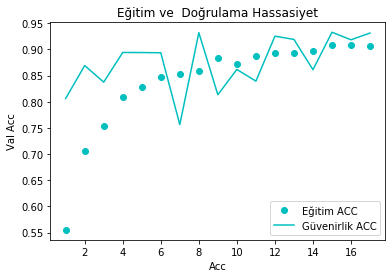

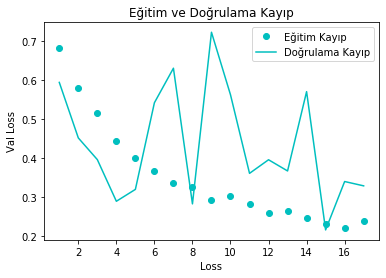

In [33]:
GrafCiz(GecmisHepsi)

Overfit artı modeledik paralellik azaldı ama dogruluk oranı artığı gözlemledim

In [34]:
EgitimUreticiDrop=VeriGenHepsi.flow_from_directory(TestDosya, target_size=(150,150),batch_size=64, class_mode='binary')
TestKayip, TestDogruluk=model.evaluate_generator(TesUretici,steps=90)
print('TEST ACC:',TestDogruluk)

Found 160 images belonging to 2 classes.
TEST ACC: 0.9312499761581421
